In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('hr_data.csv')

In [ ]:
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [ ]:
 df.shape

(14999, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
##selecting categorical columns
df.select_dtypes(exclude=['int','float']).head()

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [ ]:
##different departments avaiable
labels = list(df.department.unique())

<ipython-input-14-1a4bdbc94988>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels=df.department.unique(), rotation=45)


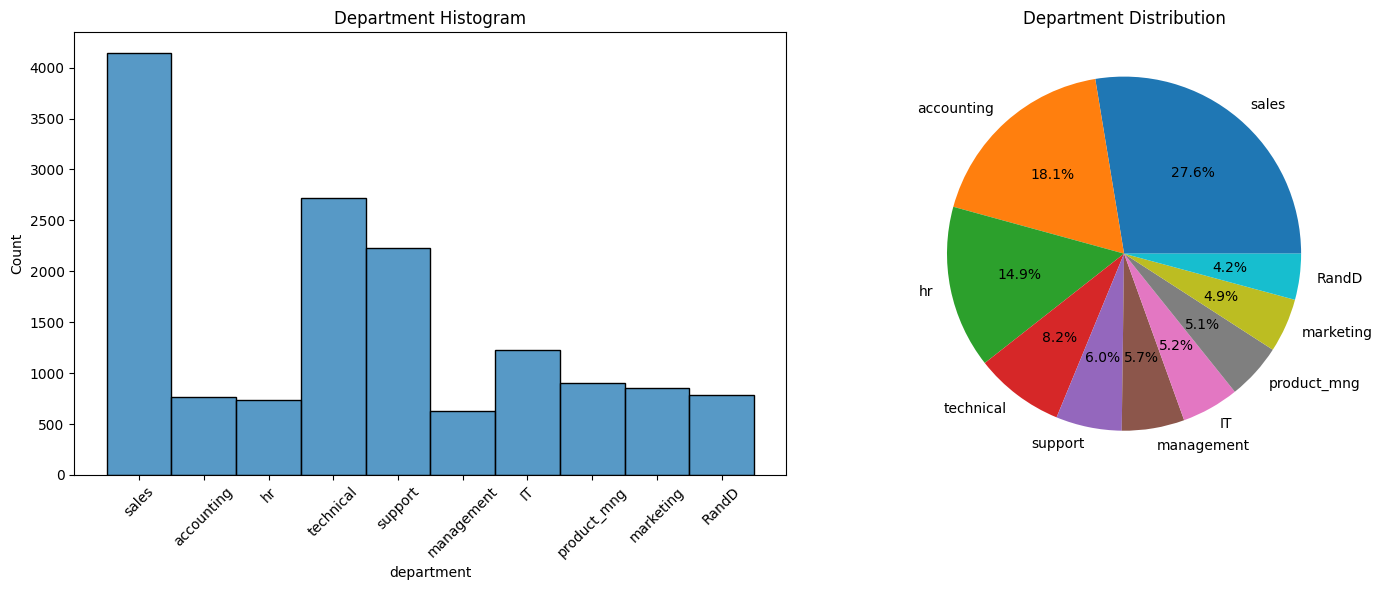

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df.department, ax=axes[0])
axes[0].set_title('Department Histogram')
axes[0].set_xticklabels(labels=df.department.unique(), rotation=45)


axes[1].pie(df.department.value_counts(), labels=labels, autopct='%1.1f%%')
axes[1].set_title('Department Distribution')


plt.tight_layout()
plt.show()


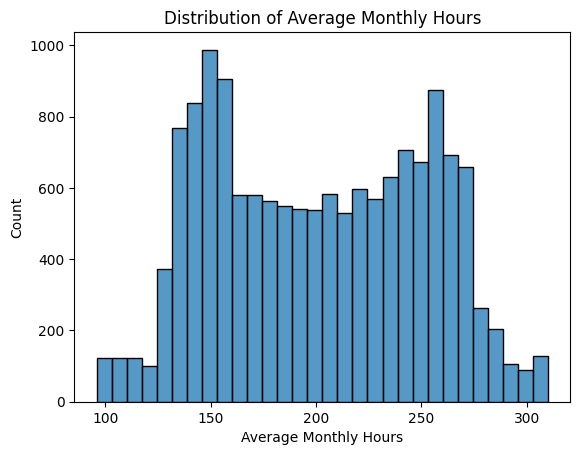

In [ ]:
sns.histplot(df['average_montly_hours'])
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Count')
plt.show()


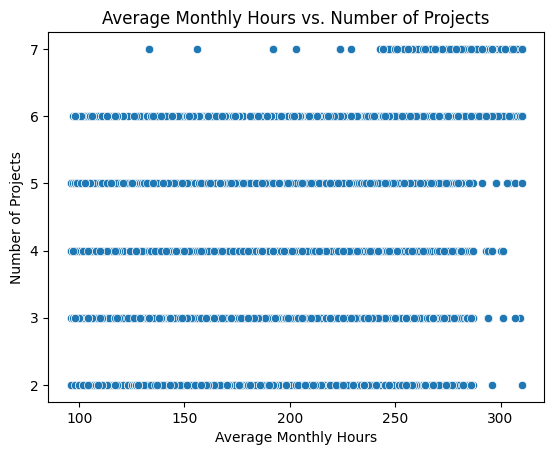

In [ ]:
sns.scatterplot(x='average_montly_hours', y='number_project', data=df)
plt.title('Average Monthly Hours vs. Number of Projects')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Number of Projects')
plt.show()


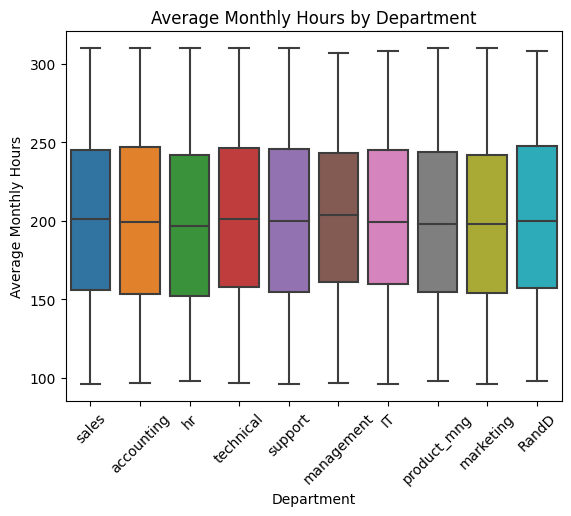

In [ ]:
sns.boxplot(x='department', y='average_montly_hours', data=df)
plt.title('Average Monthly Hours by Department')
plt.xlabel('Department')
plt.ylabel('Average Monthly Hours')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#loading the evaluation and employee satisfaction data
df2 = pd.read_excel('employee_satisfaction_evaluation.xlsx')


In [ ]:
df2.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [ ]:
df2.rename(columns={'EMPLOYEE #':'employee_id'},inplace=True)


In [ ]:
df2

,employee_id,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


In [ ]:
data = pd.merge(df,df2,on='employee_id',how='inner')

In [ ]:
data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [ ]:
data.isnull().head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
##getting the data with null values
data[data.isnull().any(axis=1)].head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN


In [ ]:
data.fillna(data.mean(),inplace=True)

<ipython-input-26-d85acd3950fb>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(),inplace=True)


In [ ]:
##removing the id columns
data.drop('employee_id',inplace=True,axis =1)

In [ ]:
data.groupby('department').sum()

<ipython-input-28-80ad2f97337c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('department').sum()


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [ ]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

<ipython-input-30-45c01eaee81c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


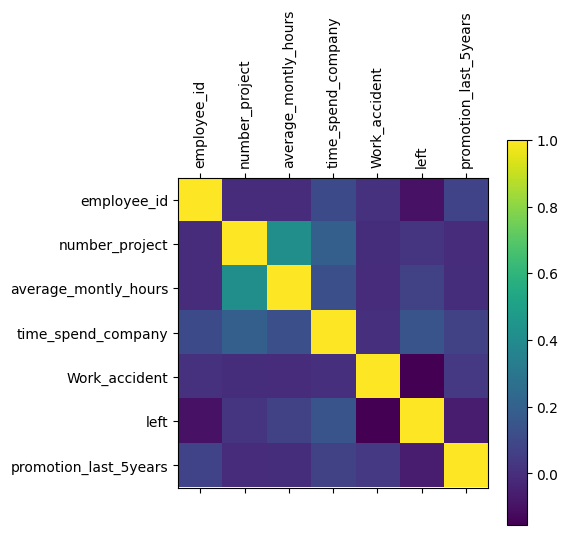

In [ ]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(5,5))
ax.legend
cax = ax.matshow(corr)
fig.colorbar(cax)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

In [ ]:
##preparing the data for model buliding and encoding the categorical columns
data.select_dtypes(exclude=['int','float']).columns 

Index(['department', 'salary'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['department'] = label.fit_transform(data['department'])
data['salary'] = label.fit_transform(data['salary'])

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('left',axis=1)
y = data['left']


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
predict = model.predict(X_test)


In [ ]:
print("Accuracy: {0:.2f}%".format(100*accuracy_score(predict,y_test)))
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

Accuracy: 76.69%
[[3161  264]
 [ 785  290]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3425
           1       0.52      0.27      0.36      1075

    accuracy                           0.77      4500
   macro avg       0.66      0.60      0.61      4500
weighted avg       0.73      0.77      0.74      4500



In [ ]:
##using random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
pred = model2.predict(X_test)

In [ ]:
print("Accuracy: {0:.2f}%".format(100*accuracy_score(pred,y_test)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 98.56%
[[3419    6]
 [  59 1016]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3425
           1       0.99      0.95      0.97      1075

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [ ]:
import tensorflow as tf

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(9,kernel_initializer="uniform",activation="relu",input_dim=9))
model3.add(tf.keras.layers.Dense(1,kernel_initializer="uniform",activation='sigmoid'))
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 9)                 90        
                                                                 
 dense_21 (Dense)            (None, 1)                 10        
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size=10
epochs = 25
history = model3.fit(X_train,y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(X_test,y_test))
score = model3.evaluate(X_test,y_test,verbose=0)


Epoch 1/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.4052 - accuracy: 0.8381 - val_loss: 0.2716 - val_accuracy: 0.9000
Epoch 2/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2236 - accuracy: 0.9331 - val_loss: 0.2017 - val_accuracy: 0.9416
Epoch 3/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1838 - accuracy: 0.9480 - val_loss: 0.1849 - val_accuracy: 0.9489
Epoch 4/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1723 - accuracy: 0.9508 - val_loss: 0.1799 - val_accuracy: 0.9478
Epoch 5/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1678 - accuracy: 0.9513 - val_loss: 0.1787 - val_accuracy: 0.9491
Epoch 6/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1647 - accuracy: 0.9521 - val_loss: 0.1773 - val_accuracy: 0.9478
Epoch 7/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1627 - accuracy: 0.9524 - val_loss: 0.1769 - val_accuracy:

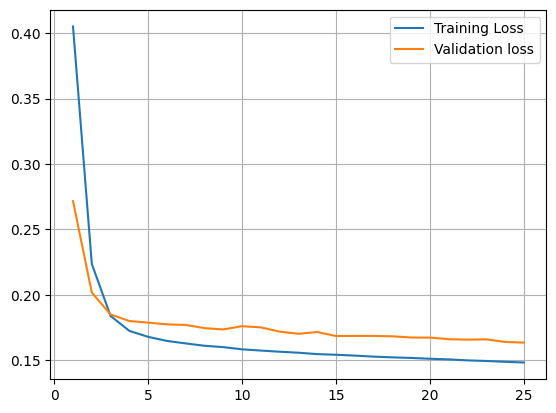

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
line1 = plt.plot(epochs,loss_values,label='Training Loss')
line2 = plt.plot(epochs,val_loss,label='Validation loss')
plt.legend()
plt.grid(True)
plt.show()


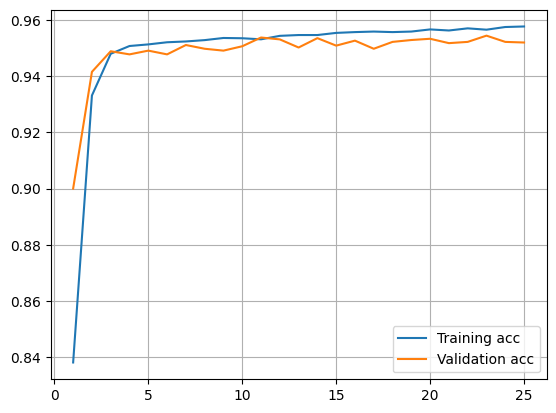

In [ ]:
history_dict = history.history
loss_values = history_dict['accuracy']
val_loss = history_dict['val_accuracy']
epochs = range(1,len(loss_values)+1)
line1 = plt.plot(epochs,loss_values,label='Training acc')
line2 = plt.plot(epochs,val_loss,label='Validation acc')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pred_= model3.predict(X_test)
pred_ = (pred_>0.5)

141/141 [==============================] - 0s 1ms/step


In [ ]:

print(confusion_matrix(y_test,pred_))
print(classification_report(y_test,pred_))

[[3330   95]
 [ 121  954]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3425
           1       0.91      0.89      0.90      1075

    accuracy                           0.95      4500
   macro avg       0.94      0.93      0.93      4500
weighted avg       0.95      0.95      0.95      4500



array([[5.1905918e-05],
       [2.6059737e-03],
       [3.2109397e-03],
       ...,
       [3.2265391e-04],
       [1.3100079e-03],
       [5.7627544e-02]], dtype=float32)